# Convexity Correction

# 👉 <a id = "top">Table of Contents</a> 👈 

# [1. Functions](#p1)

# [2. CMS 10y semi-annually over the next 5 years](#p2)

# [3. CMS 2y quarterly over the next 10 years](#p3)

# [4. Comparing forward swap rates with the CMS rate](#p4)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import quad
from scipy.stats import norm

# <a id = "p1">1.</a>  <font color = "green"> Functions </font>  [back to table of contents](#top)

In [2]:
def g_0(K):
    return K

def g_1(K):
    return 1.0

def g_2(K):
    return 0.0

In [3]:
def IRR_0(K, m, tenor):
    # Implementation of IRR(K) function
    value = 1/K * ( 1.0 - 1/(1 + K/m)**(tenor*m) )
    return value

def IRR_1(K, m, tenor):
    # Implementation of IRR'(K) function (1st derivative)
    firstDerivative = -1/K*IRR_0(K, m, tenor) + 1/(K*m)*tenor*m/(1+K/m)**(tenor*m+1)
    return firstDerivative

def IRR_2(K, m, tenor):
    # Implementation of IRR''(K) function (2nd derivative)
    secondDerivative = -2/K*IRR_1(K, m, tenor) - 1/(K*m*m)*(tenor*m)*(tenor*m+1)/(1+K/m)**(tenor*m+2)
    return secondDerivative

In [4]:
def h_0(K, m, tenor):
    # implementation of h(K)
    value = g_0(K) / IRR_0(K, m, tenor)
    return value

def h_1(K, m, tenor):
    # implementation of h'(K) (1st derivative)
    firstDerivative = (IRR_0(K, m, tenor)*g_1(K) - g_0(K)*IRR_1(K, m, tenor)) / IRR_0(K, m, tenor)**2
    return firstDerivative

def h_2(K, m, tenor):
    # implementation of h''(K) (2nd derivative)
    secondDerivative = ((IRR_0(K, m, tenor)*g_2(K) - IRR_2(K, m, tenor)*g_0(K) - 2.0*IRR_1(K, m, tenor)*g_1(K))/IRR_0(K, m, tenor)**2 
                        + 2.0*IRR_1(K, m, tenor)**2*g_0(K)/IRR_0(K, m, tenor)**3)
    return secondDerivative

In [ ]:
## Import IRS Data
Discount_Factors = pd.read_csv("Discount_Factors.csv")
Discount_Factors

,Years,Rate,OIS_Discount_Factor,IRS_Discount_Factor,Forward_LIBOR
0,0.5,0.025000,0.998752,0.987654,0.025000
1,1.0,0.028000,0.997009,0.972577,0.031245
2,1.5,0.029000,0.995270,0.957378,0.031242
3,2.0,0.030000,0.993531,0.942179,0.033275
4,2.5,0.030750,0.991773,0.926330,0.034038
5,3.0,0.031500,0.990015,0.910482,0.035565
6,3.5,0.032000,0.988066,0.894731,0.035309
7,4.0,0.032500,0.986117,0.878981,0.036328
8,4.5,0.032750,0.984150,0.863985,0.035053
9,5.0,0.033000,0.982184,0.848989,0.035562


In [ ]:
## Import the SABR parameters in Part 2
Calibration_parameters_df = pd.read_csv('Calibration_parameters_df.csv')
Calibration_parameters_df

,start,tenor,Beta,alpha,rho,nu,sigma
0,1,1,1.638113e-10,0.139074,-0.633223,2.049416,0.2250
1,1,2,1.016550e-07,0.184650,-0.525114,1.677383,0.2872
2,1,3,8.475424e-13,0.196851,-0.482848,1.438125,0.2978
3,1,5,8.330658e-11,0.178059,-0.414493,1.064842,0.2607
4,1,10,2.489366e-05,0.169984,-0.255690,0.792209,0.2447
5,5,1,8.974038e-07,0.166618,-0.585668,1.340427,0.2726
6,5,2,1.571376e-07,0.199534,-0.547030,1.062005,0.2983
7,5,3,1.579106e-05,0.210314,-0.549687,0.936773,0.2998
8,5,5,7.319718e-06,0.190244,-0.506814,0.674546,0.2660
9,5,10,5.778986e-02,0.174809,-0.415705,0.511310,0.2451


In [ ]:
Alpha = Calibration_parameters_df[["start","tenor","alpha"]]
Alpha = Alpha.pivot(index="start",columns="tenor",values="alpha")
Alpha

tenor,1,2,3,5,10
start,,,,,
1,0.139074,0.184650,0.196851,0.178059,0.169984
5,0.166618,0.199534,0.210314,0.190244,0.174809
10,0.178282,0.196313,0.208253,0.201583,0.180231


In [ ]:
Rho = Calibration_parameters_df[["start","tenor","rho"]]
Rho = Rho.pivot(index="start",columns="tenor",values="rho")
Rho

tenor,1,2,3,5,10
start,,,,,
1,-0.633223,-0.525114,-0.482848,-0.414493,-0.255690
5,-0.585668,-0.547030,-0.549687,-0.506814,-0.415705
10,-0.548440,-0.547530,-0.553589,-0.563656,-0.508403


In [ ]:
Nu = Calibration_parameters_df[["start","tenor","nu"]]
Nu = Nu.pivot(index="start",columns="tenor",values="nu")
Nu

tenor,1,2,3,5,10
start,,,,,
1,2.049416,1.677383,1.438125,1.064842,0.792209
5,1.340427,1.062005,0.936773,0.674546,0.511310
10,1.010303,0.928630,0.871684,0.722512,0.580357


In [ ]:
## Linear interpolate Libor DF
def LIBORDF(T, 
            df = Discount_Factors):
    x = list(df['Years'])
    y = list(df['IRS_Discount_Factor'])
    return np.interp(T, x, y)

## Linear interpolate OIS DF
def OISDF(T, 
          df = Discount_Factors):
    x = list(df['Years'])
    y = list(df['OIS_Discount_Factor'])
    return np.interp(T, x, y)

def Forward_LIBOR(m, 
                  D1, 
                  D2):
    return m * ((D1 - D2) / D2)

In [ ]:
## Calculate swap rate
def Forward_Swap_Rate(expiry, 
                      tenor, 
                      m):
    floated, fix = 0, 0
    for i in range(1, int(tenor * m)+1):
        end = expiry + i/m
        floated += OISDF(end) * Forward_LIBOR(m, LIBORDF(end-1/m), LIBORDF(end)) * 1/m
        fix += OISDF(expiry + i/m)/m
    return floated/fix

In [12]:
## Calculate the SABR implied volatitlity
def SABR(F, 
         K, 
         T, 
         alpha, 
         beta, 
         rho, 
         nu):
    
    X = K
    if F == K:
        numer1 = (((1 - beta)**2)/24)*alpha*alpha/(F**(2 - 2*beta))
        numer2 = 0.25*rho*beta*nu*alpha/(F**(1 - beta))
        numer3 = ((2 - 3*rho*rho)/24)*nu*nu
        VolAtm = alpha*(1 + (numer1 + numer2 + numer3)*T)/(F**(1-beta))
        sabrsigma = VolAtm
    else:
        z = (nu/alpha)*((F*X)**(0.5*(1-beta)))*np.log(F/X)
        zhi = np.log((((1 - 2*rho*z + z*z)**0.5) + z - rho)/(1 - rho))
        numer1 = (((1 - beta)**2)/24)*((alpha*alpha)/((F*X)**(1 - beta)))
        numer2 = 0.25*rho*beta*nu*alpha/((F*X)**((1 - beta)/2))
        numer3 = ((2 - 3*rho*rho)/24)*nu*nu
        numer = alpha*(1 + (numer1 + numer2 + numer3)*T)*z
        denom1 = ((1 - beta)**2/24)*(np.log(F/X))**2
        denom2 = (((1 - beta)**4)/1920)*((np.log(F/X))**4)
        denom = ((F*X)**((1 - beta)/2))*(1 + denom1 + denom2)*zhi
        sabrsigma = numer/denom
        
    return sabrsigma

In [ ]:
# Linear interpolate SABR parameters
def ParameterInterp (dataframe, 
                     tenor, 
                     expiry):
    
    linear_interp = []
    new_paras = []
    for i in [1,2,3,5,10]:
        linear_interp.append(np.interp(tenor, [1, 5, 10], dataframe[i]))
    for i in range(5):
        new_paras.append(linear_interp[i])
    result = np.interp(expiry, [1, 2, 3, 5, 10], new_paras)
    return float(result)

In [14]:
## Black 76 pricing formula
def black76_payer(F, K, t, sigma):
    d1 = (np.log(F/K)+(1/2)*(sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    price = F*norm.cdf(d1) - K*norm.cdf(d2)
    return price

def black76_receiver(F, K, t, sigma):
    d1 = (np.log(F/K)+1/2*(sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    price = K*norm.cdf(-d2) - F*norm.cdf(-d1)
    return price

In [15]:
## IRR-Settled payer and recevier swaption integrant at time T
def Rec_Integral(F, K, m, tenor, t, sigma):
    return h_2(K, m, tenor) * black76_receiver(F, K, t, sigma)

def Pay_Integral(F, K, m, tenor, t, sigma):
    return h_2(K, m, tenor) * black76_payer(F, K, t, sigma)

In [16]:
## Calculate the CMS rate
def CMS(m, tenor, expiry):
    F = Forward_Swap_Rate(expiry, tenor, m)
    alpha = ParameterInterp(Alpha, tenor, expiry)
    rho = ParameterInterp(Rho, tenor ,expiry)
    nu = ParameterInterp(Nu, tenor ,expiry)
    CMS = \
            (
                F 
                + quad(lambda x: Rec_Integral(F, x, m, tenor ,expiry, SABR(F,x,expiry,alpha,0.9,rho,nu)), 0, F)[0]
                + quad(lambda x: Pay_Integral(F, x, m, tenor ,expiry, SABR(F,x,expiry,alpha,0.9,rho,nu)), F, 0.1)[0]
                )
            
    return CMS

In [17]:
## Calculate the present value of the CMS leg
def PV_CMS(m, tenor, expiry):
    n = int(expiry*m)           # Number of coupon payments
    pv = 0
    for i in range(1,n+1):      # For each coupon payment
        ti = i/m                # Get the time (in years) it is supposed to be paid out
        pv += (OISDF(ti)/m) * CMS(m, tenor, expiry)     # Calculate its present value by discounting by OIS discount factor
    return pv

# <a id = "p2">2.</a>  <font color = "green"> CMS 10y semi-annually over the next 5 years </font>  [back to table of contents](#top)

In [18]:
tenor = 10
expiry = 5
m = 2
print('PV of a leg receiving CMS10y semi-annually over the next 5 years is ', PV_CMS(m, tenor, expiry))

PV of a leg receiving CMS10y semi-annually over the next 5 years is  0.21871580641304533


# <a id = "p3">3.</a>  <font color = "green"> CMS 2y quarterly over the next 10 years </font>  [back to table of contents](#top)

In [19]:
tenor1 = 2
expiry1 = 10
m1 = 4
print('PV of a leg receiving CMS2y quarterly over the next 10 years = ', PV_CMS(m1, tenor1, expiry1))

PV of a leg receiving CMS2y quarterly over the next 10 years =  0.43177897212202104


# <a id = "p4">4.</a>  <font color = "green"> Comparing forward swap rates with the CMS rate </font>  [back to table of contents](#top)

In [20]:
forward_swap_rates = pd.read_csv("Forward_swap_rates_df.csv")   # From Part 1
forward_swap_rates

,Start,Tenor,Forward_Swap_Rates
0,1,1,0.032007
1,1,2,0.033259
2,1,3,0.034011
3,1,5,0.035255
4,1,10,0.038428
5,5,1,0.039274
6,5,2,0.040075
7,5,3,0.040072
8,5,5,0.041093
9,5,10,0.043634


In [21]:
cms_start_time = [1, 5, 10]
cms_duration = [1, 2, 3, 5, 10]
cms_forward_swap = [[x, y] for x in cms_start_time for y in cms_duration]
cms_forward_swap

[[1, 1],
 [1, 2],
 [1, 3],
 [1, 5],
 [1, 10],
 [5, 1],
 [5, 2],
 [5, 3],
 [5, 5],
 [5, 10],
 [10, 1],
 [10, 2],
 [10, 3],
 [10, 5],
 [10, 10]]

In [ ]:
cms_rates = []
for forward_swap in cms_forward_swap:
    expiry, tenor = forward_swap
    discount_factor = Discount_Factors.loc[tenor, "OIS_Discount_Factor"]
    swap_rate = CMS(m = 2, 
                    tenor = tenor, 
                    expiry = expiry)
    
    cms_rates.append([expiry, tenor, swap_rate])

cms_rates_df = pd.DataFrame(
    cms_rates,
    columns=[
        "Expiry",
        "Tenor",
        "CMS Rate",
    ],
)

In [23]:
cms_rates_df

,Expiry,Tenor,CMS Rate
0,1,1,0.032120
1,1,2,0.033349
2,1,3,0.034090
3,1,5,0.035322
4,1,10,0.038500
5,5,1,0.040217
6,5,2,0.040771
7,5,3,0.040640
8,5,5,0.041534
9,5,10,0.044154


In [24]:
forward_swap

[10, 10]

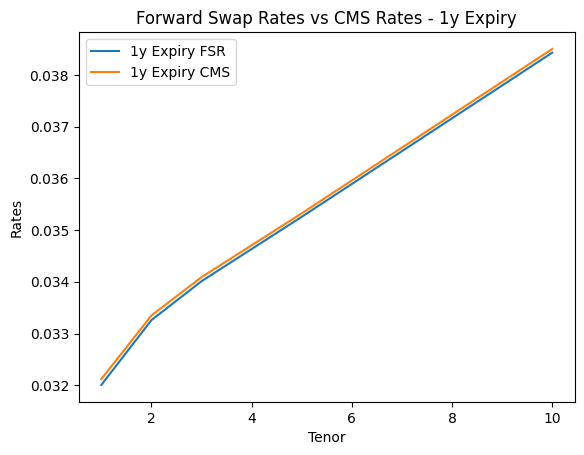

In [25]:
plt.plot(cms_rates_df["Tenor"][0:5],forward_swap_rates["Forward_Swap_Rates"][0:5],label='1y Expiry FSR')
plt.plot(cms_rates_df["Tenor"][0:5],cms_rates_df["CMS Rate"][0:5],label='1y Expiry CMS')
plt.xlabel('Tenor')
plt.ylabel('Rates')
plt.title('Forward Swap Rates vs CMS Rates - 1y Expiry')
plt.legend()
plt.show()

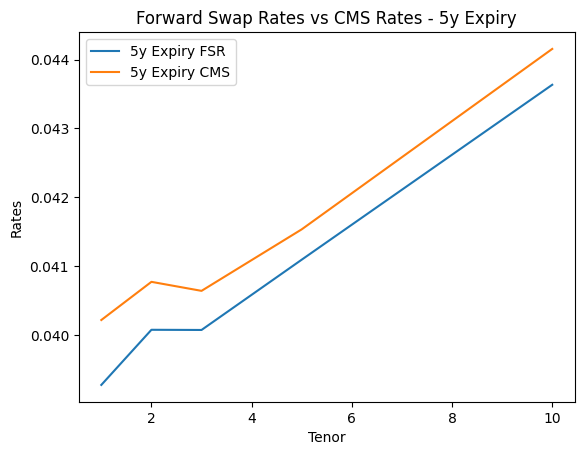

In [26]:
plt.plot(cms_rates_df["Tenor"][5:10],forward_swap_rates["Forward_Swap_Rates"][5:10],label='5y Expiry FSR')
plt.plot(cms_rates_df["Tenor"][5:10],cms_rates_df["CMS Rate"][5:10],label='5y Expiry CMS')
plt.xlabel('Tenor')
plt.ylabel('Rates')
plt.title('Forward Swap Rates vs CMS Rates - 5y Expiry')
plt.legend()
plt.show()

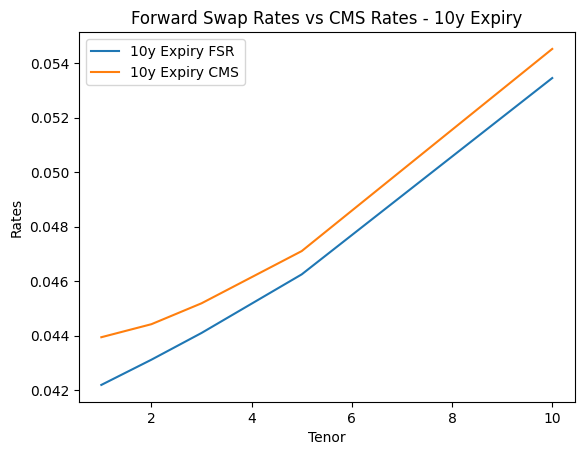

In [27]:
plt.plot(cms_rates_df["Tenor"][5:10],forward_swap_rates["Forward_Swap_Rates"][10:15],label='10y Expiry FSR')
plt.plot(cms_rates_df["Tenor"][5:10],cms_rates_df["CMS Rate"][10:15],label='10y Expiry CMS')
plt.xlabel('Tenor')
plt.ylabel('Rates')
plt.title('Forward Swap Rates vs CMS Rates - 10y Expiry')
plt.legend()
plt.show()